In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap3
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import torch

In [3]:
import importlib
import d2l.regression.model as regression
from d2l.regression.model import LinearRegressionTorch
from d2l.regression.dataset import SyntheticRegressionDatasetTorch
from d2l.base.trainer import Trainer
from d2l.base.evaluator import Evaluator
from d2l.base.plot import plot_loss
from typing import List
from matplotlib import pyplot as plt

importlib.reload(regression)

<module 'd2l.regression.model' from '/Users/jinceyang/Desktop/codebase/ml/learn_d2l/d2l/regression/model.py'>

In [4]:
rng = torch.Generator().manual_seed(42)  

In [5]:
regression_data = SyntheticRegressionDatasetTorch(w=torch.tensor([2, -3.4]), b=torch.tensor(4.2), rng=rng)

In [6]:
regression = LinearRegressionTorch(num_features=2, rng=rng)
with torch.no_grad():
    print(f"Initial weights: {regression.net[0].weight}, bias: {regression.net[0].bias}")  # type: ignore

Initial weights: Parameter containing:
tensor([[0.0195, 0.0037]], requires_grad=True), bias: Parameter containing:
tensor([0.], requires_grad=True)


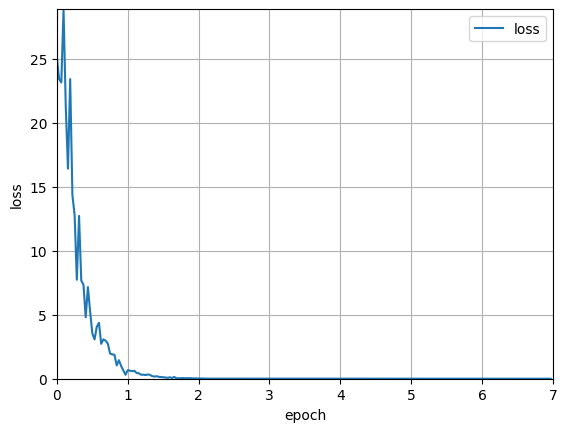

In [7]:
trainer = Trainer(model=regression, optimizer=torch.optim.SGD(regression.parameters(), lr=0.03))
all_epoch_loss: List[List[float]] = trainer.train(regression_data.get_train_dataloader_epochs(batch_size=32, epochs=7))
    
fig, ax = plt.subplots()
plot_loss(ax, all_epoch_loss)

In [8]:
evaluator = Evaluator(model=regression)
test_loss = evaluator.loss(regression_data.get_test_dataloader(batch_size=regression_data.num_test))

print(f"Test loss: {test_loss:.6f}")
with torch.no_grad():
    print(f"Learned weights: {regression.net[0].weight.reshape((-1,))}, expected: [2, -3.4]") # type: ignore
    print(f"Learned bias: {regression.net[0].bias}, expected: 4.2") # type: ignore

Test loss: 0.000085
Learned weights: tensor([ 2.0003, -3.4005], requires_grad=True), expected: [2, -3.4]
Learned bias: Parameter containing:
tensor([4.2001], requires_grad=True), expected: 4.2
